# Time Series

In [242]:
%matplotlib inline
# @quangphu1912: this is to show the plot in the notebook 
# https://stackoverflow.com/questions/43545050/using-matplotlib-notebook-after-matplotlib-inline-in-jupyter-notebook-doesnt

In [243]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

`Time series data is an important form of structured data in many different fields`, such as finance, economics, ecology, neuroscience, and physics. Anything that is observed or measured at many points in time forms a time series. Many time series are `fixed frequency`, which is to say that data points *occur at regular intervals according to some rule*, such as every 15 seconds, every 5 minutes, or once per month. Time series can also be `irregular` *without a fixed unit of time or offset between units*.<br> How you mark and refer to time series data depends on the application, and you may have one of the following: 
* `Timestamps`, specific instants in time
* Fixed `periods`, such as the month January 2007 or the full year 2010
* `Intervals` of time, indicated by a start and end timestamp. Periods can be thought of as special cases of intervals
* Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time (e.g., the diameter of a cookie baking each second since being placed in the oven)

## 11.1 Date and Time Data Types and Tools

The Python standard library includes data types for date and time data, as well as calendar-related functionality. The `datetime`, `time`, and `calendar` modules are the main places to start. The `datetime.datetime` type, or simply `datetime`, is widely used:

In [34]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2021, 11, 7, 0, 8, 22, 431740)

In [35]:
now.year, now.month, now.day

(2021, 11, 7)

`datetime` stores both the date and time down to the microsecond. `timedelta` represents the temporal difference between two datetime objects:

In [36]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [37]:
delta.days

926

In [38]:
delta.seconds

56700

You *can add (or subtract) a* `timedelta` or multiple thereof to a `datetime` object to yield a new shifted object:

In [39]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(1, 12)

datetime.datetime(2011, 1, 8, 0, 0, 12)

In [40]:
timedelta?

Init signature: timedelta(self, /, *args, **kwargs)
Docstring:     
Difference between two datetime values.

timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

All arguments are optional and default to 0.
Arguments may be integers or floats, and may be positive or negative.
File:           d:\users\phu.le2\anaconda3\lib\datetime.py
Type:           type
Subclasses:     _Timedelta


In [41]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 11.1.1. Converting Between String and Datetime

You can *format `datetime` objects* and pandas Timestamp objects, which I’ll introduce later, as *strings* using `str` or the `strftime` method, passing a format specification

In [42]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [43]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

You can use these same format codes to convert strings to dates using `datetime.strptime`:

In [44]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [45]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

`datetime.strptime` is a good way to parse a date with a known format. *However, it can be a bit annoying to have to write a format spec each time, especially for common date formats*. In this case, you can use the `parser.parse` method in the third-party `dateutil` package (this is installed automatically when you install pandas):

In [46]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

`dateutil` is capable of parsing most human-intelligible date representations:

In [47]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In international locales, day appearing before month is very common, so you can pass `dayfirst=True` to indicate this:

In [48]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is *generally oriented toward working with arrays of dates*, whether used as an axis index or a column in a DataFrame. The `to_datetime` method parses many different kinds of date representations. Standard date formats like ISO 8601 can be parsed very quickly:

In [49]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

It also handles values that should be considered missing (None, empty string, etc.):

In [50]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [51]:
idx[2]
#NaT (Not a Time) is pandas’s null value for timestamp data.

NaT

In [52]:
pd.isnull(idx)

array([False, False,  True])

**CAUTION**
`dateutil.parser` is a useful but imperfect tool. Notably, *it will recognize some strings as dates that you might prefer that it didn’t* — for example, '42' will be parsed as the year 2042 with today’s calendar date.

## 11.2 Time Series Basics

### 11.2.0

A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as `Python strings` or `datetime` objects:

In [53]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts
#@P: index = column date, value =random value, ts = timeseries

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

Under the hood, these `datetime` objects have been put in a `DatetimeIndex`:

In [54]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series automatically align on the dates:

In [55]:
ts[::2] #@P: slice by step ever 2 lines

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [56]:
ts + ts[::2]
#@P note: in the odd column, where they do not have the value to perform add calculation -> NaN return

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

Recall that ts[::2] selects every second element in ts.<br> pandas stores timestamps using NumPy’s `datetime64` data type at the nanosecond resolution

In [57]:
ts.index.dtype

dtype('<M8[ns]')

Scalar values from a `DatetimeIndex` are pandas `Timestamp` objects:

In [58]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

A `Timestamp` can be substituted anywhere you would use a `datetime` object. Additionally, it can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations. More on both of these things later.

### 11.2.1. Indexing, Selection, Subsetting

Time series behaves like any other `pandas.Series` when you are indexing and selecting data based on label:

In [59]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [60]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

As a convenience, you can also *pass a string that is interpretable as a date:*

In [61]:
ts['1/10/2011']

1.9657805725027142

In [62]:
ts['20110110']

1.9657805725027142

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [63]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
#@P: to create a time series with index start from 1/1/2020

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [64]:
longer_ts.tail()
#@P: this is lase entries of this timeseries

2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, dtype: float64

In [65]:
longer_ts['2001']
#Here, the string '2001' is interpreted as a year and selects that time period.

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [66]:
#This also works if you specify the month:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

Slicing with `datetime` objects works as well:

In [67]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [68]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [69]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

As before, you can pass either a string date, `datetime`, or timestamp. Remember that slicing in this manner produces views on the source time series like slicing NumPy arrays. This means that no data is copied and modifications on the slice will be reflected in the original data.

There is an equivalent instance method, `truncate`, that slices a Series between two dates:

In [70]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

All of *this holds true for DataFrame as well*, indexing on its rows:

In [71]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### 11.2.2. Time Series with Duplicate Indices

In some applications, there may be multiple data observations falling on a particular timestamp. Here is an example:

In [72]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

We can tell that *the index is not unique by checking* its `is_unique` property:

In [73]:
dup_ts.index.is_unique

False

Indexing into this time series will now either produce scalar values or slices depending on whether a timestamp is duplicated:

In [74]:
dup_ts['1/3/2000']  # not duplicated

4

In [75]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

Suppose you wanted to *aggregate the data having non-unique timestamps*.#@P: duplicated timestamp<br>
One way to do this is to use `groupby` and pass `level=0`:

In [76]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [77]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3. Date Ranges, Frequencies, and Shifting

Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. For many applications this is sufficient. However, *it’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series*. Fortunately pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed-frequency date ranges. For example, you can convert the sample time series to be fixed daily frequency by calling resample:

In [78]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [79]:
resampler = ts.resample('D')
#The string 'D' is interpreted as daily frequency.

### 11.3.1. Generating Date Ranges

While I used it previously without explanation, `pandas.date_range` is responsible for generating a `DatetimeIndex` with an indicated length according to a particular frequency:

In [80]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, `date_range` generates daily timestamps. If you pass only a start or end date, *you must pass a number of periods* to generate:

In [81]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

`The start and end dates define strict boundaries for the generated date index.` For example, if you wanted a date index containing the last business day of each month, you would pass the 'BM' frequency (business end of month; see more complete listing of frequencies in Table 11-4) and *only dates falling on or inside the date interval will be included*:

In [83]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

`date_range` by default preserves the time (if any) of the start or end timestamp:

In [84]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but want to generate a set of timestamps *normalized* to midnight as a convention. To do this, there is a normalize option:

In [85]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 11.3.2. Frequencies and Date Offsets

Frequencies in pandas are composed of a *base frequency* and a multiplier. Base frequencies are typically referred to by a string alias, like `'M'` for monthly or `'H'` for hourly. For each base frequency, there is an object defined generally referred to as a `date offset`. For example, hourly frequency can be represented with the `Hour` class:

In [86]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

You can define a *multiple of an offset* by passing an integer:

In [87]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In most applications, you would never need to explicitly create one of these objects, instead using a string alias like 'H' or '4H'. Putting an integer before the base frequency creates a multiple:

In [88]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Many offsets can be combined together by addition:

In [89]:
Hour(2) + Minute(30)

<150 * Minutes>

Similarly, you can pass frequency strings, like '1h30min', that will effectively be parsed to the same expression:

In [90]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Some frequencies describe points in time that are not evenly spaced. For example, 'M' (calendar month end) and 'BM' (last business/weekday of month) depend on the number of days in a month and, in the latter case, whether the month ends on a weekend or not. We refer to these as `anchored offsets`.

#### Week of month dates

One useful frequency class is “week of month,” starting with WOM. This enables you to get dates like the third Friday of each month:

In [91]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 11.3.3. Shifting (Leading and Lagging) Data

“Shifting” refers to moving data backward and forward through time. Both Series and DataFrame have a `shift` method for doing naive shifts forward or backward, leaving the index unmodified:

In [92]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [93]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

In [94]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

When we shift like this, missing data is introduced either at the start or the end of the time series.

*A common use* of `shift` is computing percent changes in a time series or multiple time series as DataFrame columns. This is expressed as:

ts / ts.shift(1) - 1

Because naive shifts leave the index unmodified, some data is discarded. Thus if the frequency is known, it can be passed to `shift` to advance the timestamps instead of simply the data:

In [95]:
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

Other frequencies can be passed, too, giving you some flexibility in how to lead and lag the data:

In [96]:
ts.shift(3, freq='D')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

In [97]:
ts.shift(1, freq='90T')
#The T here stands for minutes.

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
dtype: float64

#### Shifting dates with offsets

The pandas date offsets can also be used with `datetime` or `Timestamp` objects:

In [98]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

If you add an anchored offset like `MonthEnd`, the first increment will “roll forward” a date to the next date according to the frequency rule:

In [99]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [100]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Anchored offsets can explicitly “roll” dates forward or backward by simply using their `rollforward` and `rollback` methods, respectively:

In [101]:
offset = MonthEnd()
offset

<MonthEnd>

In [102]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [103]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

A creative use of date offsets is to use these methods with `groupby`:

In [104]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [105]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

Of course, an easier and faster way to do this is using resample (we’ll discuss this in much more depth in Section 11.6, “Resampling and Frequency Conversion,”):

In [106]:
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## 11.4. Time Zone Handling

Many time series users choose to work with time series in `coordinated universal time` or `UTC`, which is the successor to Greenwich Mean Time and is the current international standard. Time zones are expressed as offsets from UTC; for example, New York is four hours behind UTC during daylight saving time and five hours behind the rest of the year.

In Python, time zone information comes from the third-party `pytz library` (installable with pip or conda), which exposes the Olson database, a compilation of world time zone information. This is especially important for historical data because the daylight saving time (DST) transition dates (and even UTC offsets) have been changed numerous times depending on the whims of local governments. In the United States, the DST transition times have been changed many times since 1900!

For detailed information about the pytz library, you’ll need to look at that library’s documentation. As far as this book is concerned, pandas wraps `pytz`’s functionality so you can ignore its API outside of the time zone names

Time zone names can be found interactively and in the docs:

In [107]:
import pytz #@P:tips to remember: python timezone
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

*To get a time zone object from pytz*, use `pytz.timezone`:

In [108]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

*Methods in pandas will accept* either `time zone names` or `these objects`.

### 11.4.1. Time Zone Localization and Conversion

By default, time series in pandas are *time zone naive*. For example, consider the following time series:

In [109]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

The index’s tz field is *None*:

In [110]:
print(ts.index.tz)

None


Date ranges can be generated with a time zone set:

In [111]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

*Conversion from naive to localized* is handled by the *tz_localize* method:

In [112]:
ts


2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [113]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [114]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time series has been localized to a particular time zone, it *can be converted to another time zone* with `tz_convert`:

In [115]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In the case of the preceding time series, which straddles a DST transition in the *America/New_York* time zone, we could localize to EST and convert to, say, UTC or Berlin time:

In [116]:
ts_eastern = ts.tz_localize('America/New_York')

In [117]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
dtype: float64

`tz_localize` and `tz_convert` are also instance methods on DatetimeIndex:

In [118]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

**CAUTION**<br>
Localizing naive timestamps also checks for ambiguous or non-existent times around *daylight saving time transitions*.

### 11.4.2. Operations with Time Zone−Aware *Timestamp Objects*

Similar to time series and date ranges, individual `Timestamp` objects similarly can be localized from naive to time zone–aware and converted from one time zone to another:

In [119]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

You can also *pass a time zone* when creating the Timestamp:

In [120]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Time zone–aware `Timestamp objects internally store a UTC timestamp value as nanoseconds` since the Unix epoch (January 1, 1970); this UTC value is *invariant between time zone conversions:*

In [121]:
stamp_utc.value

1299902400000000000

In [122]:
stamp_utc.tz_convert('America/New_York').value
#P note: this value is a constant as explain above

1299902400000000000

When performing time arithmetic using pandas’s `DateOffset` objects, pandas respects daylight saving time transitions where possible. Here we construct timestamps that occur right before DST transitions (forward and backward). First, 30 minutes before transitioning to DST:

In [123]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [124]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

Then, 90 minutes before transitioning out of DST:

In [125]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [126]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 11.4.3. Operations Between Different Time Zones

`If two time series with different time zones are combined, the result will be UTC.` Since the timestamps are stored under the hood in UTC, *this is a straightforward operation and requires no conversion to happen*:

In [127]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [128]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2 #@P: when add 2 timestamps that has been coverted to different timezone -> result is store in UTC
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5. Periods and Period Arithmetic

`Periods` represent timespans, like days, months, quarters, or years. The Period class represents this data type, requiring a string or integer and a frequency from Table 11-4:

In [129]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In this case, the Period object represents the full timespan from January 1, 2007, to December 31, 2007, inclusive. Conveniently, *adding and subtracting integers* from periods has the *effect of shifting by their frequency*:

In [130]:
p + 5

Period('2012', 'A-DEC')

In [131]:
p - 2

Period('2005', 'A-DEC')

If two periods have the same frequency, their difference is the number of units between them:

In [132]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

Regular ranges of periods can be constructed with the `period_range` function:

In [133]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

The `PeriodIndex` class stores a sequence of periods and can serve as an axis index in any pandas data structure:

In [134]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

If you have an array of strings, you can also use the `PeriodIndex` class:

In [135]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### 11.5.1. Period Frequency Conversion

Periods and `PeriodIndex` objects can be converted to another frequency with their asfreq method.<br>
As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year. This is fairly straightforward:

In [136]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [137]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [138]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

You can think of Period('2007', 'A-DEC') as being a sort of cursor pointing to a `span of time`, subdivided by monthly periods. @P vietsub: this case point to a year and could be divided to smaller frequency, such as month

* For a *fiscal year* ending on a month other than December, the corresponding monthly subperiods are different:

In [139]:
p = pd.Period('2007', freq='A-JUN') #@P: to specify the frequency as annual and start in June
p

Period('2007', 'A-JUN')

In [140]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [141]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

When you are converting from high to low frequency, pandas determines the superperiod depending on where the subperiod “belongs.” For example, in A-JUN frequency, the month Aug-2007 is actually part of the 2008 period:

In [142]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Whole `PeriodIndex` objects or time series can be similarly converted with the same semantics:

In [143]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64

In [144]:
ts.asfreq('M', how='start')

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

Here, the annual periods are replaced with monthly periods corresponding to the first month falling within each annual period. If *we instead wanted the last business day of each year*, we can use the 'B' frequency and indicate that we want the end of the period:

In [145]:
ts.asfreq('B', how='end')

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### 11.5.2.Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields. Much quarterly data is reported relative to a `fiscal year end`, typically the last calendar or business day of one of the 12 months of the year. Thus, the period 2012Q4 has a different meaning depending on fiscal year end.

pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [146]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [147]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [148]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

Thus, it’s possible to do easy period arithmetic; for example, *to get the timestamp at 4 PM on the second-to-last business day of the quarter*, you could do:

In [149]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [150]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

You can generate quarterly ranges using `period_range`. Arithmetic is identical, too:

In [151]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [152]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 11.5.3. Converting Timestamps to Periods (and Back)

Series and DataFrame objects indexed by timestamps can be converted to periods with the `to_period` method:

In [153]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64

In [154]:
pts = ts.to_period()
pts

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

Since periods refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency. While the frequency of the new `PeriodIndex` is inferred from the timestamps by default, you can specify any frequency you want. There is also no problem with having duplicate periods in the result:

In [155]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [156]:
ts2.to_period('M')

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

To convert back to timestamps, use `to_timestamp`:

In [157]:
pts = ts2.to_period()
pts

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [158]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

### 11.5.4. Creating a PeriodIndex from Arrays

Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns. For example, in this macroeconomic dataset, the year and quarter are in different columns:

In [159]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [160]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [161]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

By passing these arrays to `PeriodIndex` with a frequency, you can combine them to form an index for the DataFrame:

In [162]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')#@P: this periodindex combine year and quarter from 2 different column to a single period
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [163]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [164]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6. Resampling and Frequency Conversion

`Resampling` refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called `downsampling`, while converting lower frequency to higher frequency is called `upsampling`. `Not all resampling falls into either of these categories;` for example, converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.

pandas objects are equipped with a `resample` method, *which is the workhorse function for all frequency conversion*. resample has a `similar API to groupby`; you call resample to group the data, then call an aggregation function:

In [165]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
                ...   
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

In [166]:
ts.resample('M').mean()

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

In [167]:
ts.resample('M', kind='period').mean()

2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

### 11.6.1. Downsampling

Aggregating data to a regular, lower frequency is a pretty normal time series task. The data you’re aggregating doesn’t need to be fixed frequently; the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one-month intervals. Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame.<br>
There are a couple things to think about when using resample to downsample data: <br>
* Which side of each interval is closed
* How to label each aggregated bin, either with the start of the interval or the end <br><br>
To illustrate, let’s look at some one-minute data:

In [168]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

Suppose you wanted to *aggregate this data into five-minute chunks* or bars by taking the sum of each group:

In [169]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [170]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

The frequency you pass defines bin edges in five-minute increments. *By default, the left bin edge is inclusive,* so the 00:00 value is included in the 00:00 to 00:05 interval.1 Passing closed='right' changes the interval to be closed on the right:

In [171]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

Lastly, you might want to shift the result index by some amount, say *subtracting one second from the right edge to make it more clear which interval the timestamp refers to.* To do this, pass a string or date offset to loffset:

In [172]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

<ipython-input-172-b63ded3800c4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### 11.6.1.1 Open-High-Low-Close (OHLC) resampling

In finance, a popular way to aggregate a time series is to `compute four values for each bucket: the first (open), last (close), maximum (high), and minimal (low) values`.<br> By using the ohlc aggregate function you will obtain a DataFrame having columns containing these four aggregates, which are efficiently computed in a single sweep of the data:

In [173]:
ts.resample('5min').ohlc() #@P: open high low close

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 11.6.2. Upsampling and Interpolation

When converting from a low frequency to a higher frequency, no aggregation is needed. Let’s consider a DataFrame with some weekly data:

In [174]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


When you are using an aggregation function with this data, there is only one value per group, and missing values result in the gaps. We use the `asfreq` method *to convert to the higher frequency without any aggregation:*

In [175]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


Suppose you wanted to *fill forward* each weekly value on the non- Wednesdays. The same filling or interpolation methods available in the filler and reindex methods are available for resampling:

In [176]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


* You can similarly choose to `only fill a certain number of periods forward` to limit how far to continue using an observed value:

In [177]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


Notably, the new date index need not overlap with the old one at all: #P: don't understand 20211102

In [178]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


### 11.6.3. Resampling with Periods

Resampling data indexed by periods is similar to timestamps:

In [179]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.493841,-0.155434,1.397286,1.507055
2000-02,-1.179442,0.443171,1.395676,-0.529658
2000-03,0.787358,0.248845,0.743239,1.267746
2000-04,1.302395,-0.272154,-0.051532,-0.467740
2000-05,-1.040816,0.426419,0.312945,-1.115689


In [180]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


Upsampling is more nuanced, as you must make a decision about which end of the timespan in the new frequency to place the values before resampling, just like the asfreq method. The convention argument defaults to `'start'` but can also be `'end'`:

In [181]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.556703,0.016631,0.111873,-0.027445
2000Q2,0.556703,0.016631,0.111873,-0.027445
2000Q3,0.556703,0.016631,0.111873,-0.027445
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.046303,0.163344,0.251503,-0.157276
2001Q2,0.046303,0.163344,0.251503,-0.157276
2001Q3,0.046303,0.163344,0.251503,-0.157276
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [182]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


Since periods refer to timespans, the rules about upsampling and downsampling are more rigid:
* In downsampling, the target frequency must be a subperiod of the source frequency.
* In upsampling, the target frequency must be a superperiod of the source frequency.
If these rules are not satisfied, an exception will be raised. This mainly affects the quarterly, annual, and weekly frequencies; for example, the timespans defined by Q-MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC:

In [183]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


## 11.7. Moving Window Functions

`An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights.` This can be useful for smoothing noisy or gappy data. I call these moving window functions, even though it includes functions without a fixed-length window like exponentially weighted moving average. Like other statistical functions, these also automatically exclude missing data.

Before digging in, we can load up some time series data and resample it to business day frequency:

In [250]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

I now introduce the rolling operator, which behaves similarly to `resample` and `groupby`. It can be called on a Series or DataFrame along with a window (expressed as a number of periods; see Figure 11-4 for the plot created):

<AxesSubplot:>

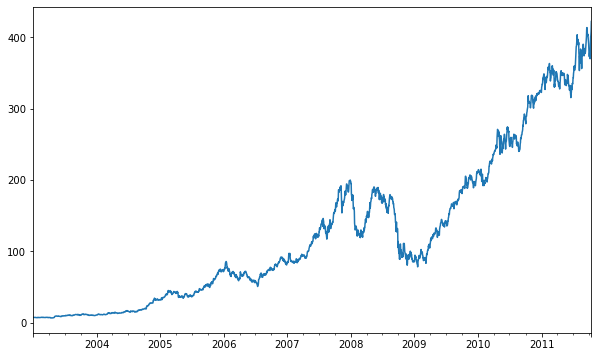

In [251]:
close_px.AAPL.plot()

<AxesSubplot:>

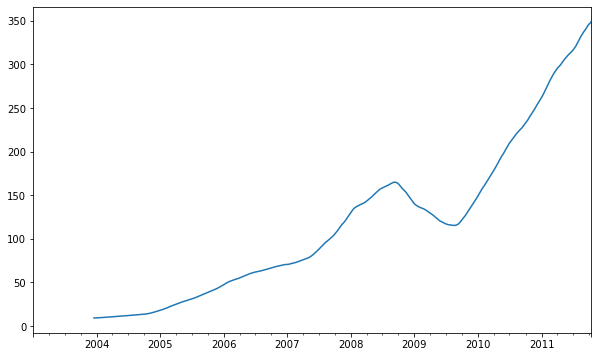

In [254]:
close_px.AAPL.rolling(250).mean().plot()

In [255]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

The expression rolling(250) is similar in behavior to groupby, but *instead of grouping it creates an object that enables grouping over a 250-day sliding window*. So here we have the 250-day moving window average of Apple’s stock price.<br>

By default rolling functions require all of the values in the window to be non-NA. This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series (see Figure 11-5):

In [256]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [257]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

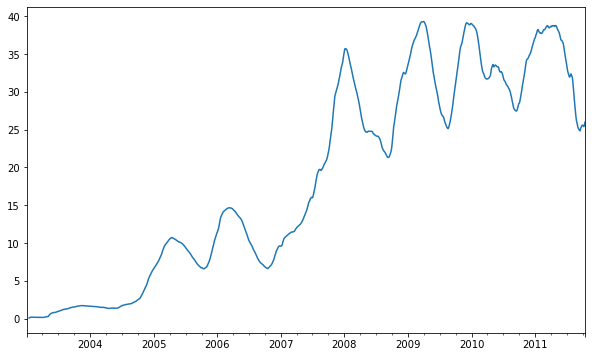

In [258]:
appl_std250.plot()

In order to compute an `expanding window mean`, use the expanding operator instead of rolling. *The expanding mean starts the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series*. An expanding window mean on the apple_std250 time series looks like this:

In [259]:
expanding_mean = appl_std250.expanding().mean()

Calling a moving window function on a DataFrame applies the transformation to each column (see Figure 11-6):

In [260]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

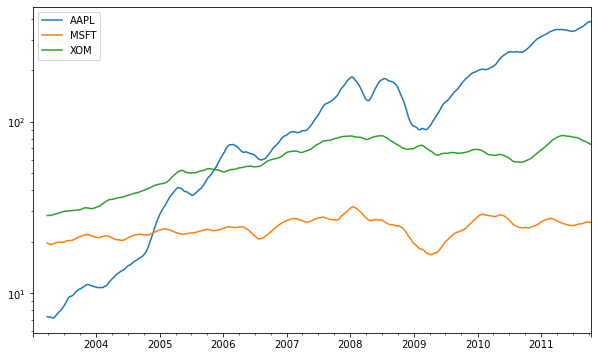

In [261]:
close_px.rolling(60).mean().plot(logy=True)

The `rolling` function also accepts a string indicating a fixed-size time offset rather than a set number of periods. Using this notation can be useful for irregular time series. These are the same strings that you can pass to `resample`. For example, we could compute a 20-day rolling mean like so:

In [262]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 11.7.1. Exponentially Weighted Functions

`An alternative to using a static window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations.` There are a couple of ways to specify the decay factor. A popular one is using a span, which makes the result comparable to a simple moving window function with window size equal to the span.<br>
Since an *exponentially weighted statistic places more weight on more recent observations*, `it “adapts” faster to changes compared with the equal weighted version.`
pandas has the `ewm` operator to go along with rolling and expanding. Here’s an example comparing a 60-day moving average of Apple’s stock price with an EW moving average with span=60 (see Figure 11-7):

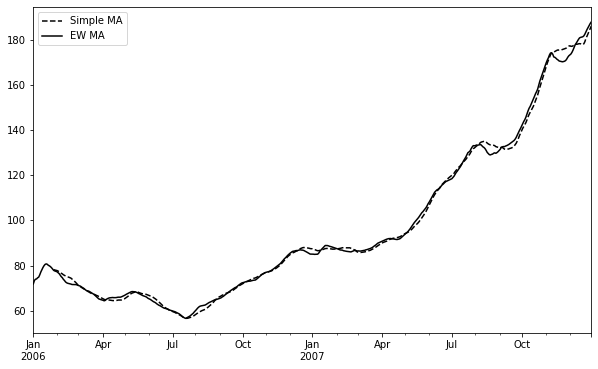

In [245]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### 11.7.2. Binary Moving Window Functions

`Some statistical operators, like correlation and covariance, need to operate on two time series`.<br>
As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. To have a look at this, we first compute the percent change for all of our time series of interest:

In [263]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [264]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

The `corr` aggregation function after we call `rolling` can then compute the rolling correlation with spx_rets (see Figure 11-8 for the resulting plot):

<AxesSubplot:>

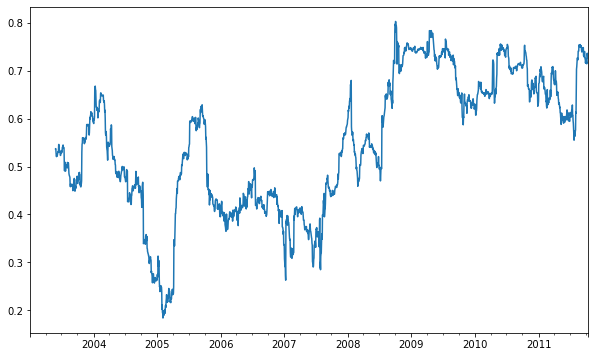

In [266]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

`Suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once`. Writing a loop and creating a new DataFrame would be easy but might get repetitive, so if you pass a Series and a DataFrame, a function like rolling_corr will compute the correlation of the Series (spx_rets, in this case) with each column in the DataFrame (see Figure 11-
9 for the plot of the result):

In [268]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

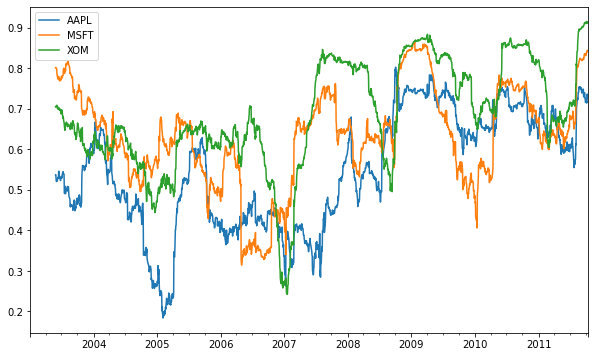

In [269]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 11.7.3. User-Defined Moving Window Functions

In [227]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

In [228]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

<AxesSubplot:>

In [229]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## 11.8. Conclusion